In [3]:
import json
import numpy as np

with open('./keyword_embeddings.json', 'r') as f:
    keyword_data = json.load(f)

with open('../../Data/keywords/all_signals_edited.json', 'r') as f:
    signals = json.load(f)

def get_average_vectors(signal):
    sensory_keywords =[k.strip() for k in signal['sensory']['keywords'][0].split(',') if k.strip() != '']
    sensory_embeddings = [keyword_data['sensory'][keyword] for keyword in sensory_keywords]
    emotional_keywords = [k.strip() for k in signal['emotional']['keywords'][0].split(',') if k.strip() != '']
    emotional_embeddings = [keyword_data['emotional'][keyword] for keyword in emotional_keywords]
    associative_keywords = [k.strip() for k in signal['associative']['keywords'][0].split(',') if k.strip() != '']
    associative_embeddings = [keyword_data['associative'][keyword] for keyword in associative_keywords]
    sensory_mean = np.mean(sensory_embeddings, axis=0)
    emotional_mean = np.mean(emotional_embeddings, axis=0)
    associative_mean = np.mean(associative_embeddings, axis=0)
    return {
        'signal_id': signal['signal_id'],
        'sensory_mean': sensory_mean.tolist(),
        'emotional_mean': emotional_mean.tolist(),
        'associative_mean': associative_mean.tolist()
    }

signal_vectors = [get_average_vectors(signal) for signal in signals]

with open('./signal_embeddings.json', 'w') as f:
    json.dump(signal_vectors, f, indent=4)

In [ ]:
import json
import numpy as np
from sklearn.manifold import MDS

with open('./signal_embeddings.json') as f:
    signal_vectors = json.load(f)

signal_ids = [s['signal_id'] for s in signal_vectors]
sensory_vectors = np.array([s['sensory_mean'] for s in signal_vectors])
emotional_vectors = np.array([s['emotional_mean'] for s in signal_vectors])
associative_vectors = np.array([s['associative_mean'] for s in signal_vectors])

mds = MDS(n_components=2, random_state=42)

sensory_2d = mds.fit_transform(sensory_vectors)
emotional_2d = mds.fit_transform(emotional_vectors)
associative_2d = mds.fit_transform(associative_vectors)

output_data = []

for i, signal_id in enumerate(signal_ids):
    output_data.append({
        "signal_id": signal_id,
        "sensory_vector": sensory_2d[i].tolist(),
        "emotional_vector": emotional_2d[i].tolist(),
        "associative_vector": associative_2d[i].tolist()
    })

# Save to JSON
with open('./signal_2d_vectors.json', 'w') as f:
    json.dump(output_data, f, indent=4)

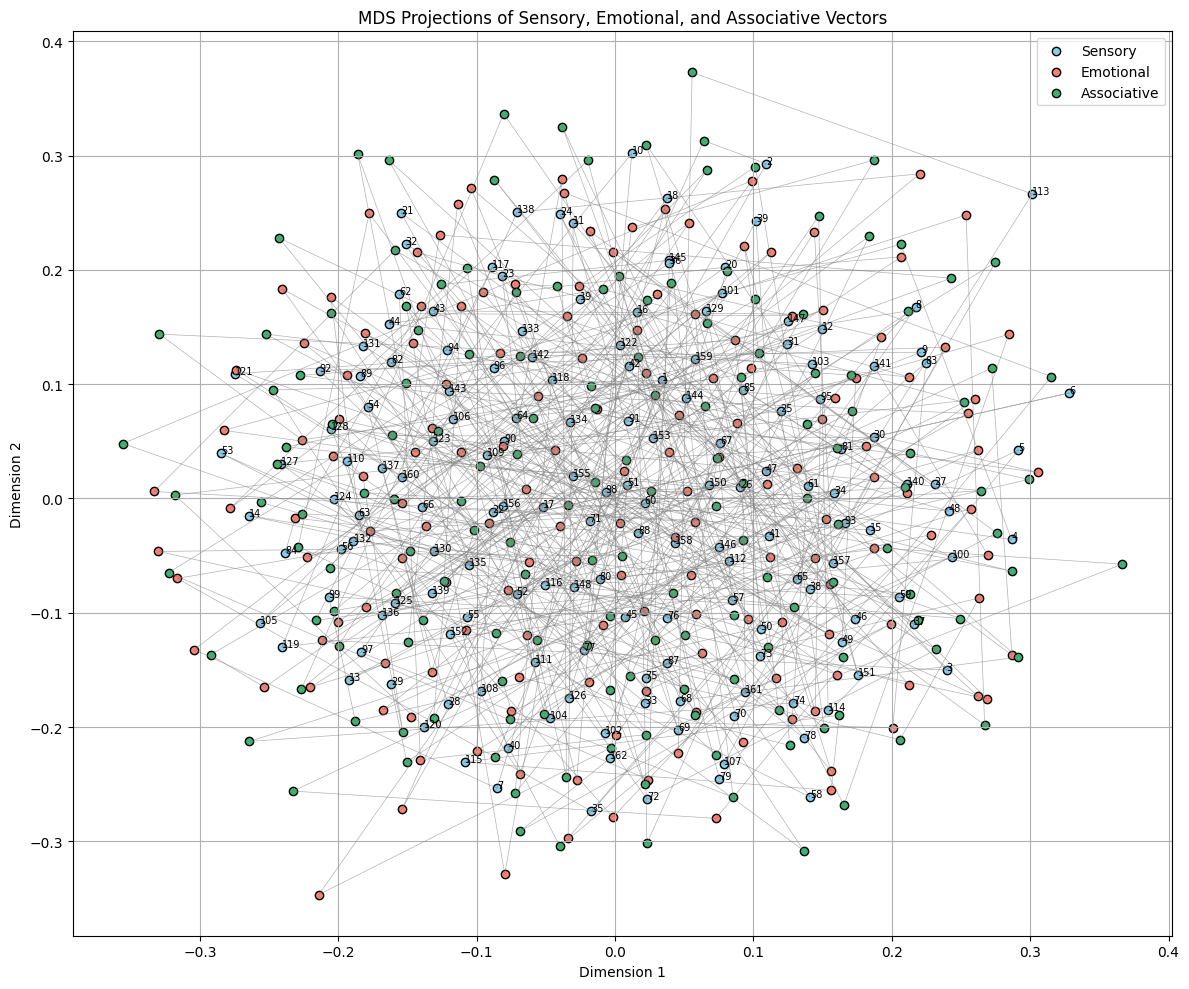

In [ ]:
import json
import matplotlib.pyplot as plt

# Load the 2D vectors
with open('./signal_2d_vectors.json') as f:
    signal_data = json.load(f)

# Prepare containers
sensory_coords = []
emotional_coords = []
associative_coords = []
signal_ids = []

for signal in signal_data:
    sensory_coords.append(signal['sensory_vector'])
    emotional_coords.append(signal['emotional_vector'])
    associative_coords.append(signal['associative_vector'])
    signal_ids.append(signal['signal_id'])

# Convert to numpy arrays
import numpy as np
sensory_coords = np.array(sensory_coords)
emotional_coords = np.array(emotional_coords)
associative_coords = np.array(associative_coords)

# Plot
plt.figure(figsize=(12, 10))

# Scatter for each vector type
plt.scatter(sensory_coords[:, 0], sensory_coords[:, 1], c='skyblue', label='Sensory', edgecolor='black')
plt.scatter(emotional_coords[:, 0], emotional_coords[:, 1], c='salmon', label='Emotional', edgecolor='black')
plt.scatter(associative_coords[:, 0], associative_coords[:, 1], c='mediumseagreen', label='Associative', edgecolor='black')

# Optional: Connect the three vectors per signal
for i in range(len(signal_ids)):
    plt.plot(
        [sensory_coords[i, 0], emotional_coords[i, 0], associative_coords[i, 0], sensory_coords[i, 0]],
        [sensory_coords[i, 1], emotional_coords[i, 1], associative_coords[i, 1], sensory_coords[i, 1]],
        c='gray', linewidth=0.5, alpha=0.6
    )

# Optional: Label signal IDs at sensory points
for i, signal_id in enumerate(signal_ids):
    plt.text(sensory_coords[i, 0], sensory_coords[i, 1], signal_id, fontsize=7, color='black')

plt.title("MDS Projections of Sensory, Emotional, and Associative Vectors")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()